In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation

from numpy import sin, cos, tan, pi

In [2]:
clr1 = 'dimgray'
params={
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'axes.labelcolor' : clr1,
    'axes.labelsize': 'medium',
    'axes.titlecolor': clr1,
    'xtick.color' : clr1,
    'ytick.color' : clr1,
    'lines.linewidth' : 2,
    'font.size' : 20, 
    'legend.framealpha': 0.5,
    'text.color' : clr1}

for (k,v) in params.items():
    mpl.rcParams[k] = v

plt.style.use('fast')#'seaborn-bright')

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Amber, CB91_Pink, CB91_Green,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

(-0.2, 1.2)

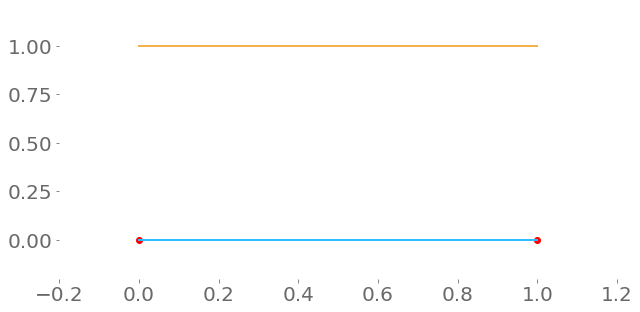

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

line1 = [[0,1], [0,0]]
line2 = [[0,1],[1,1] ]

ax.plot(line1[0], line1[1])
ax.plot(line2[0], line2[1])

ax.scatter(line1[0], line1[1], color='red')

ax.set_xlim(-0.2,1.2)
ax.set_ylim(-0.2,1.2)

(-0.2, 1.2)

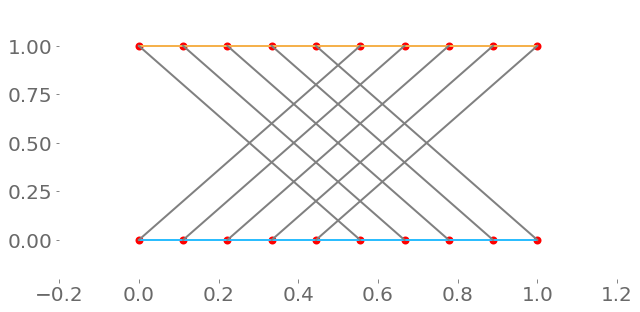

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

p1 = np.array([0,0])
p2 = np.array([1,0])
p3 = np.array([0,1])
p4 = np.array([1,1])

line1 = np.array([p1,p2])
line2 = np.array([p3,p4])

ax.plot(line1[:,0], line1[:,1], '-', lw=2)
ax.plot(line2[:,0], line2[:,1], '-', lw=2)


npts = 10

line1_x = np.linspace(p1[0], p2[0], npts)
line1_y = np.array([p1[1]]*npts)

line2_x = np.linspace(p3[0], p4[0], npts)
line2_y = np.array([p3[1]]*npts)


ax.scatter(line1_x, line1_y, lw=2, color="r")
ax.scatter(line2_x, line2_y, lw=2, color="r")


for i in range(npts):
    i1 = i
    i2 = (i+5)%npts
    
    x1, y1 = line1_x[i1], line1_y[i1]
    x2, y2 = line2_x[i2], line2_y[i2]

    ax.plot([x1,x2], [y1,y2], color="gray")


ax.set_xlim(-0.2,1.2)
ax.set_ylim(-0.2,1.2)

In [37]:
def transform_(x1,x2, y1, y2):
    
    return (x1,x2,y1,y2)
    
    #return sin(180*x1/pi)+sin(180*x2/pi), sin(180*x1/pi)-sin(180*x2/pi), y1, y2#cos(180*y1/pi), cos(180*y2/pi)

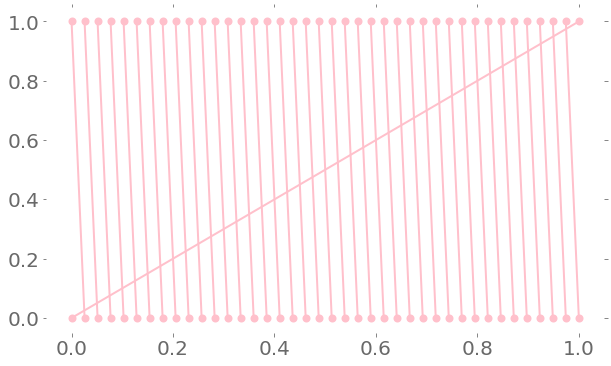

In [38]:
def animation_():    
    fig, ax = plt.subplots(figsize=(10, 6))
    p1 = np.array([0,0])
    p2 = np.array([1,0])
    p3 = np.array([0,1])
    p4 = np.array([1,1])

    npts = 40
    
    def update(mod):
        #fig, ax = plt.subplots(1,1, figsize=(10,6))
        ax.clear()

        line1 = np.array([p1,p2])
        line2 = np.array([p3,p4])

        #ax.plot(line1[:,0], line1[:,1], '-', lw=2, c='blue')
        #ax.plot(line2[:,0], line2[:,1], '-', lw=2, c='blue')



        line1_x = np.linspace(p1[0], p2[0], npts)
        line1_y = np.array([p1[1]]*npts)

        line2_x = np.linspace(p3[0], p4[0], npts)
        line2_y = np.array([p3[1]]*npts)


        ax.scatter(line1_x, line1_y, lw=2, color="pink")
        ax.scatter(line2_x, line2_y, lw=2, color="pink")


        for i in range(npts):
            i1 = i
            i2 = (i+mod)%npts

            x1, y1 = line1_x[i1], line1_y[i1]
            x2, y2 = line2_x[i2], line2_y[i2]
            
            
            (x1, x2, y1, y2) = transform_(x1,x2, y1, y2)
            
            ax.plot([x1,x2], [y1,y2], color="pink")

        #ax.set_xlim(-0.2,1.2)
        #ax.set_ylim(-0.2,1.2)
        #ax.set_xticks([])
        #ax.set_yticks([])
        
    savename="animation_tmp.mp4"
    anim = animation.FuncAnimation(fig, update, interval=20, frames=npts)
    anim.save(savename, writer=animation.FFMpegWriter(fps=4))
    
animation_()

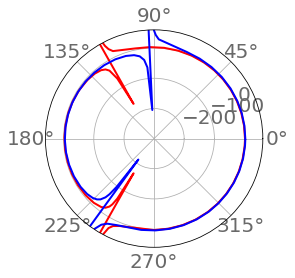

In [61]:
#import numpy as np
#import matplotlib.pyplot as plt

theta=np.arange(0,2*np.pi,2*np.pi/400)

a= 1.0      #semi-major axis
r = 10.
e1 = 2.
e2 = 3. 

def get_r(theta, e, a):
    return a*(e**2 - 1)/(1+e*np.cos(theta))

def get_theta(r, e, a):
    return np.arccos((a*(e**2 - 1) -r)/(e*r))

offset1 = get_theta(r, e1, a)
offset2 = get_theta(r, e2, a)

ax = plt.subplot(111, polar=True)
ax.plot(theta, get_r(theta, e1, a), color='r', linewidth=2)
ax.plot(theta, get_r(theta - offset2 + offset1, e2, a), color='b', linewidth=2)
ax.set_rmax(60.0)
ax.grid(True)
#plt.legend()
plt.show()

In [49]:
def transform_(x1,x2, y1, y2):
    # Do nothing
    #xx = [x1,x2]
    #yy = [y1,y2]
    #return (xx, yy)
    
    # parabola
    a = 1
    if x1==x2:
        b=2
    else:
        b = a * (y2**2 - y1**2) / (x1**2-x2**2)
    
    xx=np.linspace(x1,x2, 10)   
    yy = b**2 * (1-xx**2/a**2)
    
    return (xx, yy)
    
    #return sin(180*x1/pi)+sin(180*x2/pi), sin(180*x1/pi)-sin(180*x2/pi), y1, y2#cos(180*y1/pi), cos(180*y2/pi)

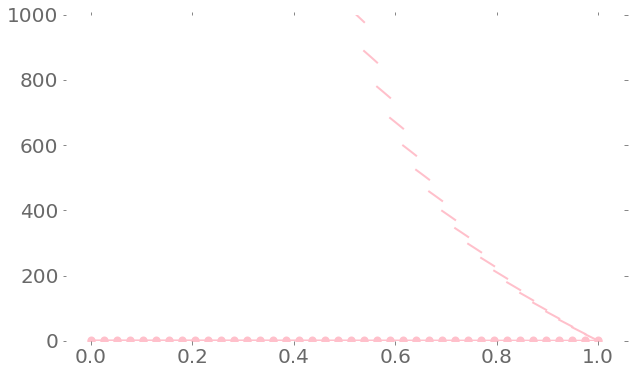

In [52]:
def animation_2():    
    fig, ax = plt.subplots(figsize=(10, 6))
    p1 = np.array([0,0])
    p2 = np.array([1,0])
    p3 = np.array([0,1])
    p4 = np.array([1,1])

    npts = 40
    
    def update(mod):
        #fig, ax = plt.subplots(1,1, figsize=(10,6))
        ax.clear()

        line1 = np.array([p1,p2])
        line2 = np.array([p3,p4])

        #ax.plot(line1[:,0], line1[:,1], '-', lw=2, c='blue')
        #ax.plot(line2[:,0], line2[:,1], '-', lw=2, c='blue')



        line1_x = np.linspace(p1[0], p2[0], npts)
        line1_y = np.array([p1[1]]*npts)

        line2_x = np.linspace(p3[0], p4[0], npts)
        line2_y = np.array([p3[1]]*npts)


        ax.scatter(line1_x, line1_y, lw=2, color="pink")
        ax.scatter(line2_x, line2_y, lw=2, color="pink")


        for i in range(npts):
            i1 = i
            i2 = (i+mod)%npts

            x1, y1 = line1_x[i1], line1_y[i1]
            x2, y2 = line2_x[i2], line2_y[i2]
            
            
            (xx, yy) = transform_(x1,x2, y1, y2)
            
            ax.plot(xx, yy, color="pink")

        #ax.set_xlim(-0.2,1.2)
        ax.set_ylim(-0.2,1000)
        #ax.set_xticks([])
        #ax.set_yticks([])
        
    savename="animation_tmp.mp4"
    anim = animation.FuncAnimation(fig, update, frames=npts)
    anim.save(savename, writer=animation.FFMpegWriter(fps=4))
    
animation_2()